In [26]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from dbdreader import DBD, MultiDBD, DBDPatternSelect
import gsw
import seawater
import cmocean

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

import plotly.express as px
import plotly.graph_objects as go

In [27]:
data = pd.read_csv("data_interp_big.csv")
data["date_time"] = pd.to_datetime(data["date_time"])
data = data.set_index("date_time")

bath = xr.open_dataset("gebco_2023_n-22.5_s-23.42_w-43.35_e-41.82.nc")

## Diagrama TS

(34.5, 37.0)

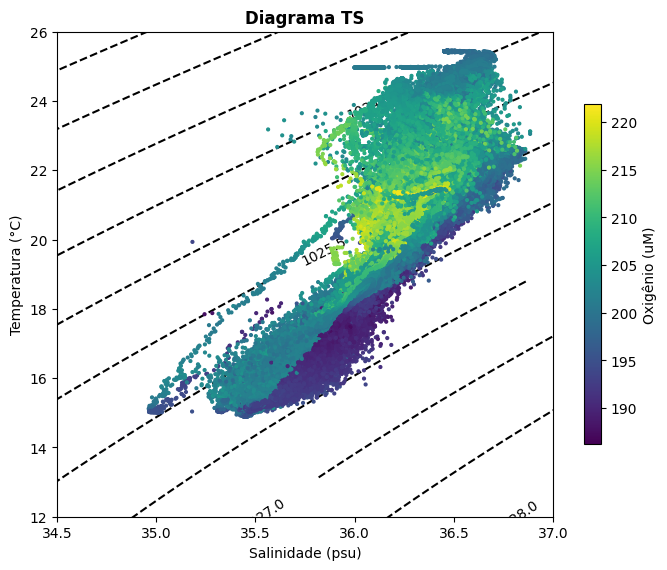

In [12]:
temperature = np.linspace(-2, 30, 100)
salinity = np.linspace(33, 40, 100)

T, S = np.meshgrid(temperature, salinity)

density_mesh = seawater.dens0(S, T)

fig, ax = plt.subplots(figsize=(8, 6.3))

contour = ax.contour(S, T, density_mesh, colors='black', linestyles='dashed',
                        levels=25)
ax.clabel(contour, inline=True, fontsize=10, fmt='%1.1f')

scatter = ax.scatter(data["sci_rbrctd_salinity_00_interp"], data["sci_rbrctd_temperature_00_interp"], c=data["sci_oxy4_oxygen_interp"], s=4, zorder=100, 
            cmap="viridis")

ax.set_ylabel('Temperatura (°C)')
ax.set_xlabel('Salinidade (psu)')
ax.set_title('Diagrama TS', weight="bold")

colorbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
colorbar.set_label("Oxigênio (uM)")


# # water masses definitions [S, T]
# stmw18 = [36.3,18.]
# sacw18 = [35.8,18.]
# eq13 = [35.2,13.]
# aaiw5 = [34.14,5.]
# aaiw3 = [34.12,3.1]
# ucdw = [34.6,2.5]
# nadw46 = [35.02,4.6]
# nadw2 = [34.91,2.02]
# aabw = [34.66,-0.3]

# swts = np.column_stack([sacw18,eq13,stmw18,aaiw5,aaiw3,ucdw,nadw46,nadw2,aabw])
# swts_names = ['SACW','EQW','STMW','AAIW5','AAIW3','uCDW','NADW4.6','NADW2','AABW']

# plt.annotate(swts_names[0],xy=(swts[0][0],swts[1][0]), zorder=200)
# plt.annotate(swts_names[1],xy=(swts[0][1],swts[1][1]), zorder=200)
# plt.annotate(swts_names[2],xy=(swts[0][2],swts[1][2]), zorder=200)
# plt.annotate(swts_names[3],xy=(swts[0][3],swts[1][3]), zorder=200)
# plt.annotate(swts_names[4],xy=(swts[0][4],swts[1][4]), zorder=200)
# plt.annotate(swts_names[5],xy=(swts[0][5],swts[1][5]), zorder=200)
# plt.annotate(swts_names[6],xy=(swts[0][6],swts[1][6]), zorder=200)
# plt.annotate(swts_names[7],xy=(swts[0][7],swts[1][7]), zorder=200)
# plt.annotate(swts_names[8],xy=(swts[0][8],swts[1][8]), zorder=200)

# plt.plot(swts[0],swts[1],marker='.', markersize=7,linestyle='none',markerfacecolor="k",markeredgecolor='k', zorder=200);

ax.set_ylim(12,26)
ax.set_xlim(34.5,37)

# plt.savefig("diagrama_TS_oxy.tiff", dpi=600, bbox_inches="tight")


## Série temporal

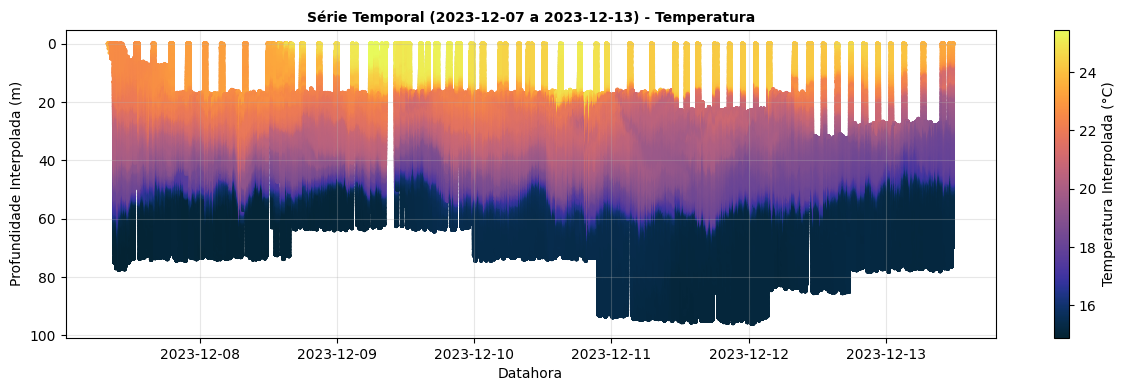

In [15]:
fig, ax = plt.subplots(figsize=(15,4))
data["Temperatura Interpolada (°C)"] = data["sci_rbrctd_temperature_00_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="Temperatura Interpolada (°C)", s=4, ax=ax,
                                        cmap=cmocean.cm.thermal)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Temperatura", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_temp.tiff", dpi=600)


In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
data["Salinidade Interpolada (psu)"] = data["sci_rbrctd_salinity_00_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="Salinidade Interpolada (psu)", s=4, ax=ax,
                                        cmap=cmocean.cm.haline)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Salinidade", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_salinity.tiff", dpi=600)


In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
data["Oxigênio Interpolado (uM)"] = data["sci_oxy4_oxygen_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="Oxigênio Interpolado (uM)", s=4, ax=ax,
                                        cmap="hsv")
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Oxigênio", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_oxygen.tiff", dpi=600)


In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
data["Chla Interpolado (g/m³)"] = data["sci_seaowl_chl_scaled_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="Chla Interpolado (g/m³)", s=4, ax=ax,
                                        cmap=cmocean.cm.algae)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Chla", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_chla.tiff", dpi=600)


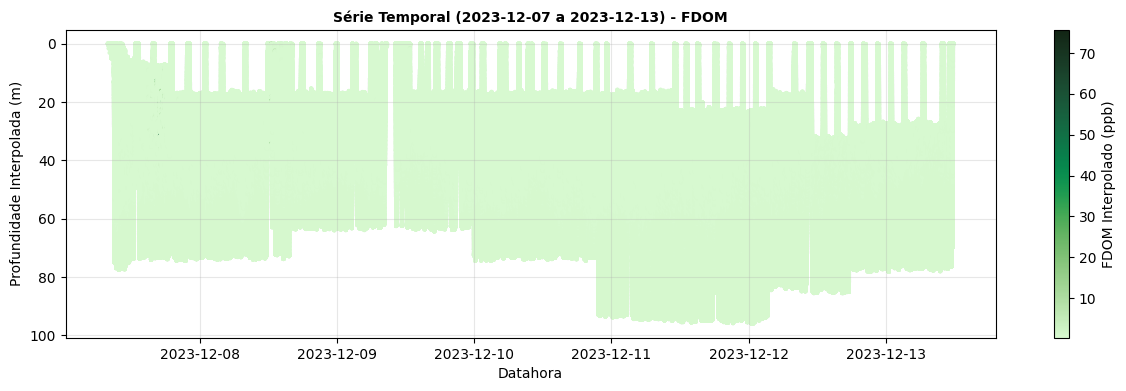

In [17]:
fig, ax = plt.subplots(figsize=(15,4))
data["FDOM Interpolado (ppb)"] = data["sci_seaowl_fdom_scaled_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="FDOM Interpolado (ppb)", s=4, ax=ax,
                                        cmap=cmocean.cm.algae)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - FDOM", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_fdom.tiff", dpi=600)


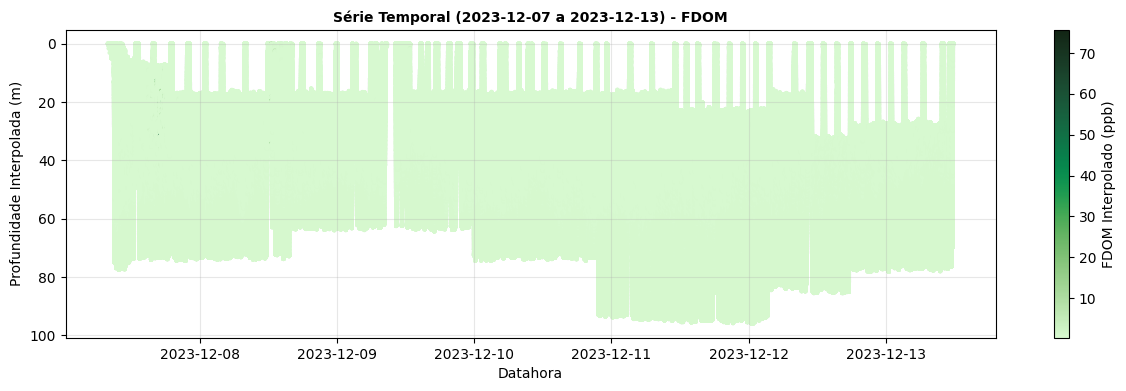

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
data["FDOM Interpolado (ppb)"] = data["sci_seaowl_fdom_scaled_interp"] 
data.reset_index().plot.scatter(x="date_time", y="m_depth_interp", c="FDOM Interpolado (ppb)", s=4, ax=ax,
                                        cmap=cmocean.cm.algae)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - FDOM", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Datahora")

ax.grid(alpha=0.3)

plt.savefig("serie_temporal_fdom.tiff", dpi=600)


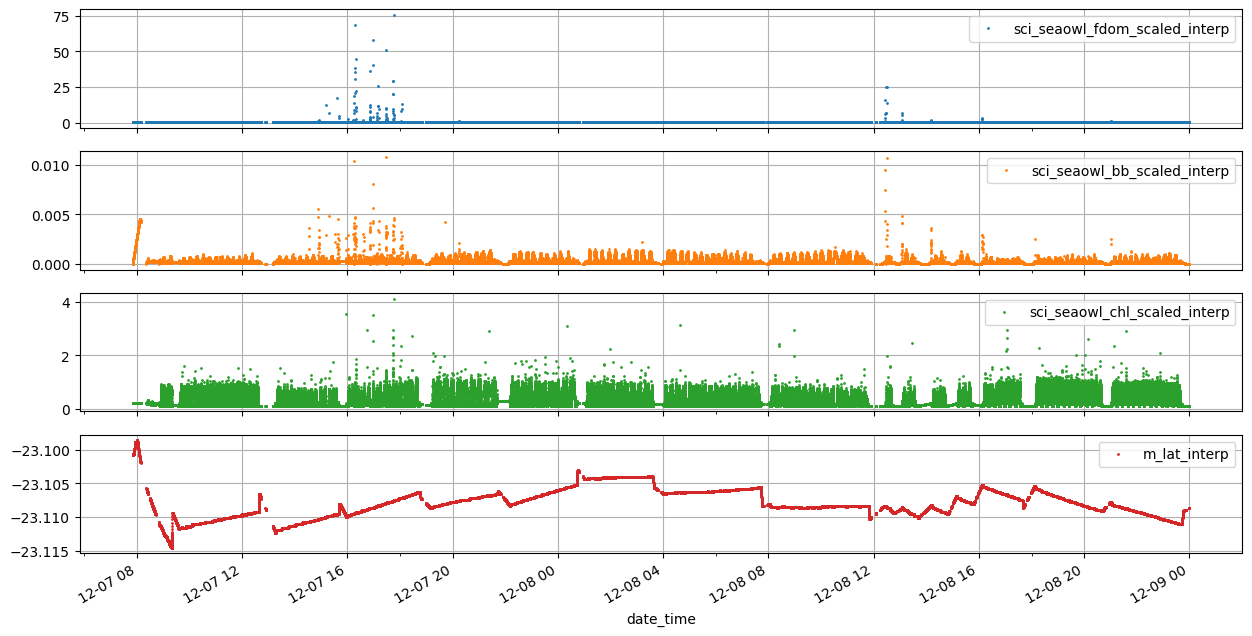

In [31]:
(
data.loc[:"2023-12-08",['sci_seaowl_fdom_scaled_interp','sci_seaowl_bb_scaled_interp','sci_seaowl_chl_scaled_interp','m_lat_interp']]
.plot(subplots=True,
    figsize=(15,8),
    grid=True,
    linestyle="none", marker='.', markersize=2)
);

## Prof vs. Longitude

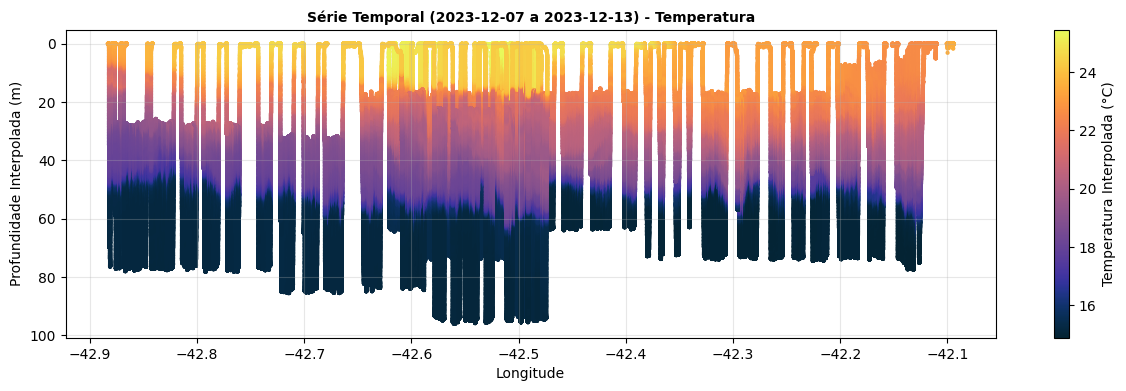

In [6]:
fig, ax = plt.subplots(figsize=(15,4))
data["Temperatura Interpolada (°C)"] = data["sci_rbrctd_temperature_00_interp"] 
data.reset_index().plot.scatter(x="m_lon_interp", y="m_depth_interp", c="Temperatura Interpolada (°C)", s=4, ax=ax,
                                        cmap=cmocean.cm.thermal)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Temperatura", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Longitude")

ax.grid(alpha=0.3)

plt.savefig("depth_lon_temp.tiff", dpi=600)


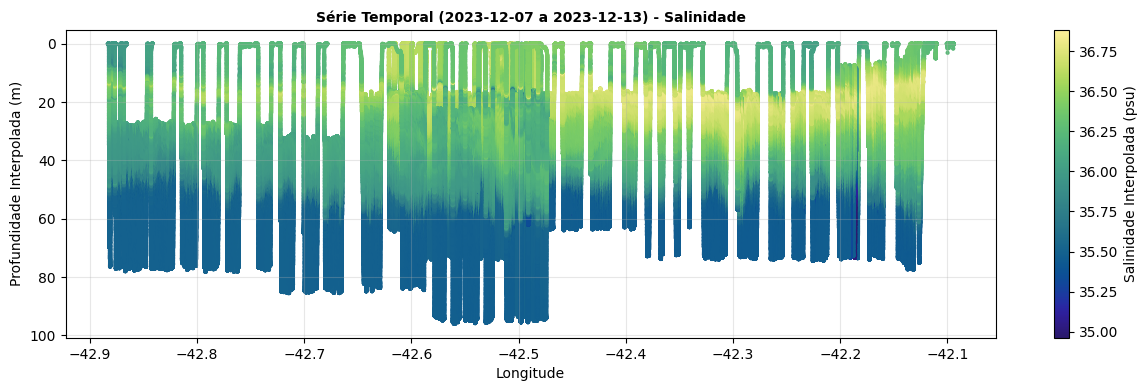

In [7]:
fig, ax = plt.subplots(figsize=(15,4))
data["Salinidade Interpolada (psu)"] = data["sci_rbrctd_salinity_00_interp"] 
data.reset_index().plot.scatter(x="m_lon_interp", y="m_depth_interp", c="Salinidade Interpolada (psu)", s=4, ax=ax,
                                        cmap=cmocean.cm.haline)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Salinidade", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Longitude")

ax.grid(alpha=0.3)

plt.savefig("depth_lon_salinity.tiff", dpi=600)


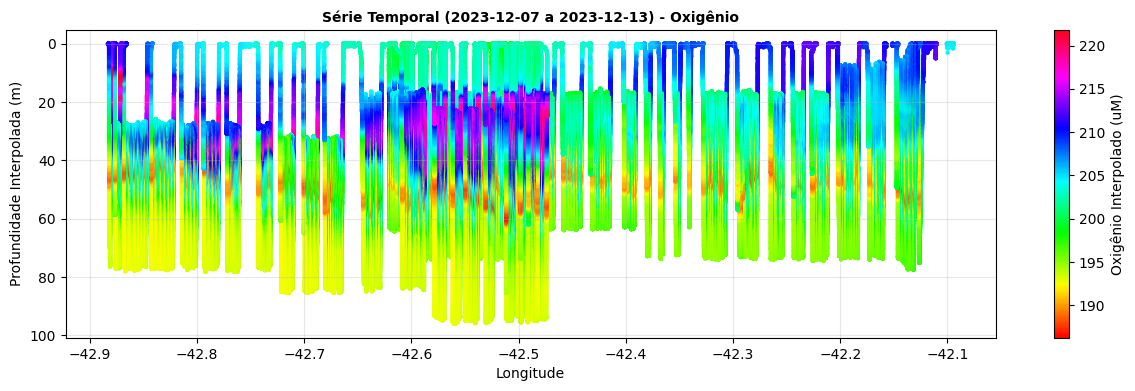

In [8]:
fig, ax = plt.subplots(figsize=(15,4))
data["Oxigênio Interpolado (uM)"] = data["sci_oxy4_oxygen_interp"] 
data.reset_index().plot.scatter(x="m_lon_interp", y="m_depth_interp", c="Oxigênio Interpolado (uM)", s=4, ax=ax,
                                        cmap="hsv")
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Oxigênio", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Longitude")

ax.grid(alpha=0.3)

plt.savefig("depth_lon_oxygen.tiff", dpi=600)


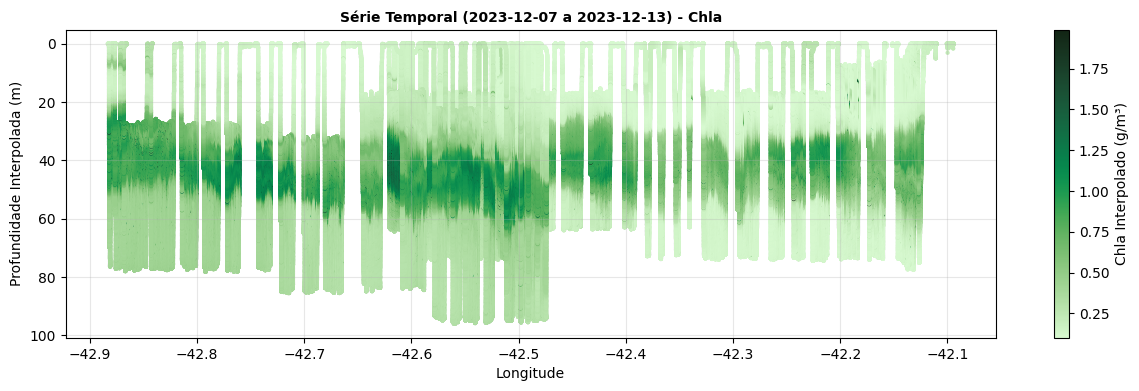

In [9]:
fig, ax = plt.subplots(figsize=(15,4))
data["Chla Interpolado (g/m³)"] = data["sci_seaowl_chl_scaled_interp"] 
data.reset_index().plot.scatter(x="m_lon_interp", y="m_depth_interp", c="Chla Interpolado (g/m³)", s=4, ax=ax,
                                        cmap=cmocean.cm.algae)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Chla", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Longitude")

ax.grid(alpha=0.3)

plt.savefig("depth_lon_chla.tiff", dpi=600)


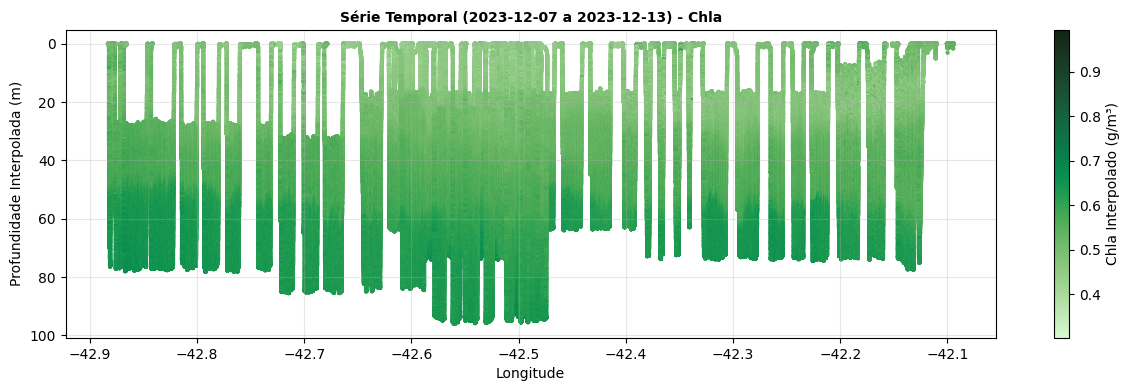

In [15]:
fig, ax = plt.subplots(figsize=(15,4))
data["Chla Interpolado (g/m³)"] = data.loc[data["sci_seaowl_fdom_scaled_interp"]<1,"sci_seaowl_fdom_scaled_interp"]
data.reset_index().plot.scatter(x="m_lon_interp", y="m_depth_interp", c="Chla Interpolado (g/m³)", s=4, ax=ax,
                                        cmap=cmocean.cm.algae)
ax.invert_yaxis()

ax.set_title("Série Temporal (2023-12-07 a 2023-12-13) - Chla", weight="bold", fontsize=10)
ax.set_ylabel("Profundidade Interpolada (m)")
ax.set_xlabel("Longitude")

ax.grid(alpha=0.3)

# plt.savefig("depth_lon_chla.tiff", dpi=600)


<Axes: xlabel='date_time'>

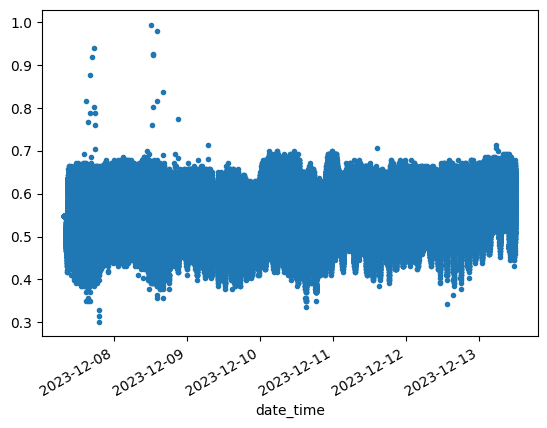

In [18]:
data.loc[data["sci_seaowl_fdom_scaled_interp"]<1,"sci_seaowl_fdom_scaled_interp"].plot(marker=".", linestyle="none")

In [11]:
data["sci_seaowl_fdom_scaled_interp"]

75.71

## Mapas

### Plotly

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px


sci_params = {"sci_water_temp_interp":{
                "colormap":"thermal",
                "colorbar_title":'Temperatura (°C)',
                "colorbar_step":2
                },
            "sci_water_salinity_interp":{
                "colormap":"haline",
                "colorbar_title":'Salinidade (psu)',
                "colorbar_step":0.2
                },
                "sci_water_density_interp":{
                "colormap":"dense",
                "colorbar_title":'Densidade (kg/m³)',
                "colorbar_step":0.5 
                }
            }

app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div(
    children=[
        dcc.Graph(id='map-plot'),
        html.Div([
            html.H6("Parâmetro:", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title
            dcc.Dropdown(
                id='parameter-dropdown',
                options=[
                    {'label': 'Temperatura', 'value': 'sci_water_temp_interp'},
                    {'label': 'Salinidade', 'value': 'sci_water_salinity_interp'},
                    {'label': 'Densidade', 'value': 'sci_water_density_interp'}
                ],
                value='sci_water_temp_interp',
                style={'fontSize': 12,'fontFamily': 'Arial, sans-serif', 'color': 'black', 'width': '80%'}

            ),
        
            html.H6("Profundidade (m):", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title

            dcc.Slider(
                id='depth-slider',
                min=data['m_depth_interp'].min(),
                max=data['m_depth_interp'].max(),
                step=1,
                marks=None,
                value=0,
                tooltip={'placement': 'bottom', 'always_visible': True},
            ),
            
            
           
        ],
        style={'position': 'absolute', 'top': '7%', 'left': '8%', 'width': '20%'}
        ),
    ],
    style={'backgroundColor': '#111111', 'color': '#7FDBFF'}
)

@app.callback(
    Output('map-plot', 'figure'),
    [Input('depth-slider', 'value'),
     Input('parameter-dropdown', 'value')]
)
def update_plot(depth, selected_parameter):
    data_sel = data[(data["m_depth_interp"] >= depth - 0.1) & (data["m_depth_interp"] <= depth + 0.2)].copy()

    fig = px.scatter_mapbox(
        data_sel,
        lat="m_lat_interp",
        lon="m_lon_interp",
        color=selected_parameter,
        color_continuous_scale=sci_params[selected_parameter]["colormap"],
        range_color=[data[selected_parameter].min(), data[selected_parameter].max()],
        size=selected_parameter,
        size_max=10,
        opacity=0.7,
        hover_name=selected_parameter,
        hover_data=["m_depth_interp"],
        mapbox_style="white-bg",
        zoom=8.5,
        center={"lat": -23.0889, "lon": -42.3318}
    )

    fig.update_layout(
        mapbox_layers=[
            {
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": 'Esri World Imagery',
                "source": [
                    'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
                ]
            }
        ],
        width=1000,
        height=700,
        title=f'Dados Comissão Ressurgência VI',
        coloraxis_colorbar=dict(
            x=0.5,
            y=0,
            len=0.5,
            outlinewidth=1,
            orientation='h',
            tickmode='array',
            tickvals=np.arange(0, 1030, sci_params[selected_parameter]["colorbar_step"]),
            ticktext=list(map(str, np.round(np.arange(0, 1030, sci_params[selected_parameter]["colorbar_step"]),2))),
            tickfont=dict(color='white'),
            thickness=10,
            title=dict(text=sci_params[selected_parameter]["colorbar_title"], font=dict(color='white', size=12), side='top')
        )
    )

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
data.sci_water_density_interp

### [DEP] Folium

In [ ]:
import folium
from matplotlib.colors import Normalize
import branca.colormap as cm
from branca.element import Template, MacroElement

In [ ]:
def plot_map(data:pd.DataFrame,
                zoom_start=10,
                center=None,
                depth=0):
        map = folium.Map(zoom_start=zoom_start, control_scale=True, location=(-23.0889,  -42.3318))

        data_sel = data[data["m_depth_interp"].between(depth-0.1, depth+0.2)].copy()

        tile_layer = folium.TileLayer(
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr='Esri World Imagery',
            name='Bathymetry',
            overlay=True,
            control=True
        ).add_to(map)

        temp_layer = folium.FeatureGroup(name='Temperatura', overlay=True).add_to(map)
        salinity_layer = folium.FeatureGroup(name='Salinidade', overlay=True).add_to(map)

        cmap = cmocean.cm.thermal
        norm = Normalize(vmin=data['sci_water_temp_interp'].min(), vmax=data['sci_water_temp_interp'].max())

        for index, row in data_sel.iterrows():
            temperature = row['sci_water_temp_interp']
            color = cmap(norm(temperature))
            hex_color = "#{:02X}{:02X}{:02X}".format(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))

            folium.CircleMarker(
                location=[row['m_lat_interp'], row['m_lon_interp']],
                popup=f'Temperature: {temperature}°C',
                color="white",
                weight=0.1,
                radius=5,
                fill=True,
                fill_color=hex_color,
                fill_opacity=0.7
            ).add_to(temp_layer)

        
        folium.LayerControl().add_to(map)

        map.add_child(folium.LatLngPopup())
        
        # colormap = cm.LinearColormap(colors=[cmap(norm(value)) for value in data_interp['sci_water_temp_interp']],
        #                             vmin=data_interp['sci_water_temp_interp'].min(),
        #                             vmax=data_interp['sci_water_temp_interp'].max())
        # colormap.caption = 'Temperature (°C)'
        # colormap.add_to(map)

        return map


In [ ]:
plot_map(data=data, depth=0)

## 3D maps

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go



increment_lat = 0.1
increment_lon = 4
lat_min = data["m_lat_interp"].min()-increment_lat
lat_max = data["m_lat_interp"].max()+increment_lat
lon_min = data["m_lon_interp"].min()-increment_lon
lon_max = data["m_lon_interp"].max()+increment_lon


bath_sel = bath.sel(lat=slice(lat_min,lat_max),
         lon=slice(lon_min,lon_max)).where(bath.elevation<10)

fig = px.scatter_3d(
    data,
    x=data["m_lon_interp"],
    y=data["m_lat_interp"],
    z=-data["m_depth_interp"],  
    # color=data["sci_rbrctd_temperature_00_interp"],
    # color=data["sci_oxy4_oxygen_interp"],   
    # color=data["sci_rbrctd_salinity_00_interp"],
    color=data["sci_seaowl_fdom_scaled_interp"],
    # color=data["sci_seaowl_chl_scaled_interp"],
    # color=data["sci_seaowl_bb_scaled_interp"],

    color_continuous_scale="turbid",
    size_max=1,
    labels={'x': 'Longitude', 'y': 'Latitude', 'z': 'Depth (negative for elevation)', 'color': 'Temperature'},
    title='Glider Data',
)


surface_trace = go.Surface(
    x=bath_sel["lon"],
    y=bath_sel["lat"],
    z=bath_sel["elevation"],
    colorscale='deep',
    showscale=False  
)

deployment_point = go.Scatter3d(
    # data.iloc[[0]],
    x=data.iloc[[0]]['m_lon_interp'],
    y=data.iloc[[0]]['m_lat_interp'],
    z=-data.iloc[[0]]['m_depth_interp'],
    marker=dict(size=13, color="green"),
    name="Deployment"
)

recovery_point = go.Scatter3d(
    # data.iloc[[0]],
    x=data.iloc[[-1]]['m_lon_interp'],
    y=data.iloc[[-1]]['m_lat_interp'],
    z=-data.iloc[[-1]]['m_depth_interp'],
    marker=dict(size=13, color="blue"),
    name="Recovery"
)
    
fig.add_trace(surface_trace)
fig.add_trace(deployment_point)
fig.add_trace(recovery_point)


fig.update_layout(
    scene=dict(
        aspectmode='manual',
        aspectratio=dict(x=3, y=1, z=1)
    ),
    width=1200,
    height=800
)

fig.show()
fig.write_html("3d_bath_fdom.html")


In [ ]:
data.iloc[[0]]['m_depth']